<a href="https://colab.research.google.com/github/victorcv02/GestionDeLaCadenaDeValor/blob/main/GraficaDeControl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Especialidad  Quejas  Sugerencias  Porcentaje  Porcentaje Acumulado
0      Pediatría     156           32   24.566929             24.566929
1    Cardiología     152           90   23.937008             48.503937
2     Neurología     142           50   22.362205             70.866142
3  Traumatología     121           51   19.055118             89.921260
4      Oncología      64           53   10.078740            100.000000


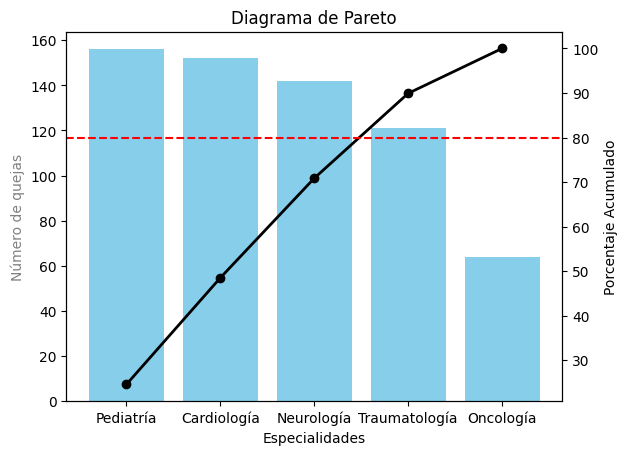

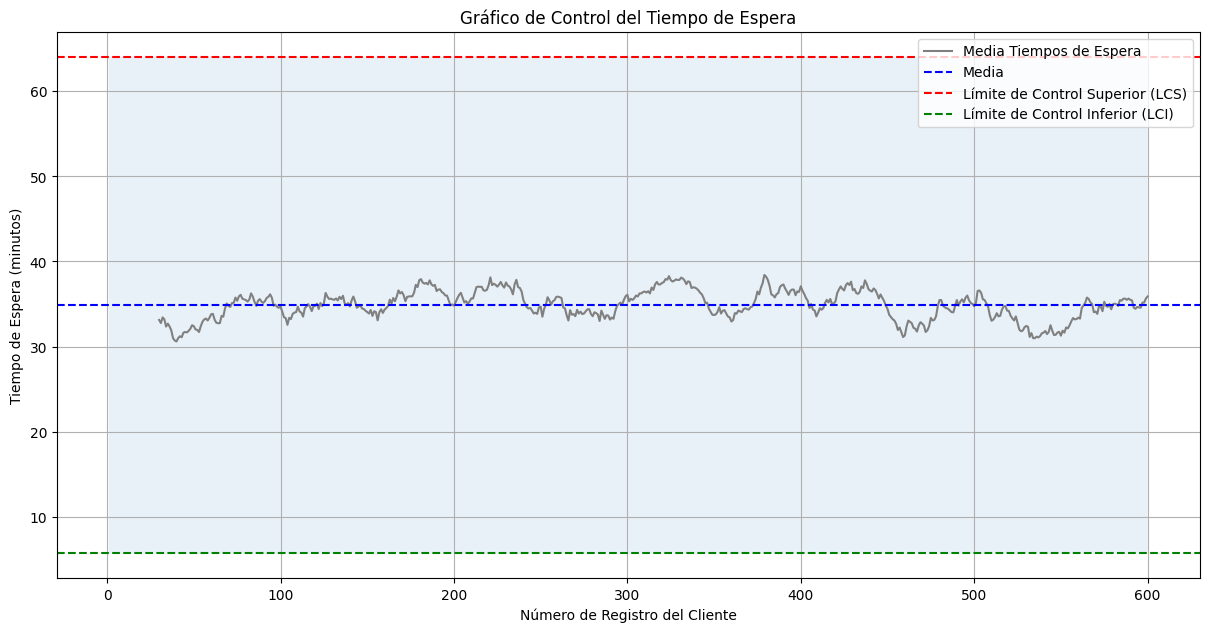

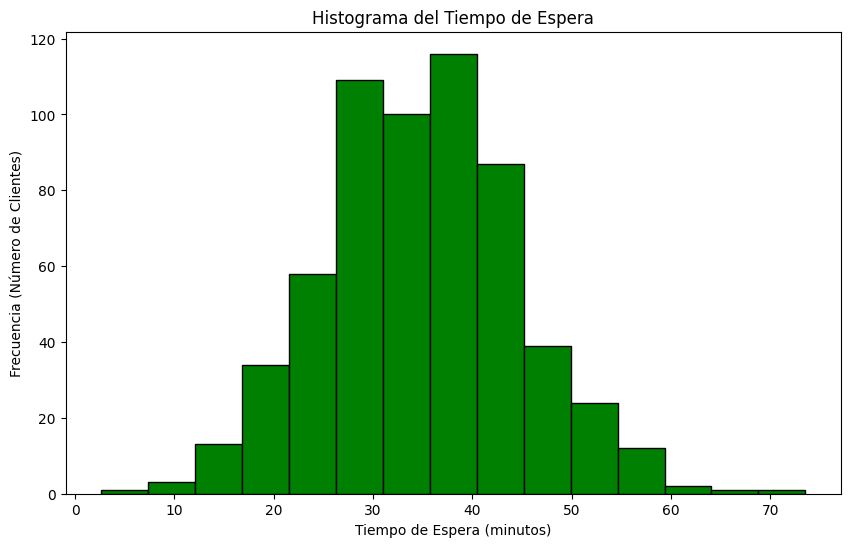

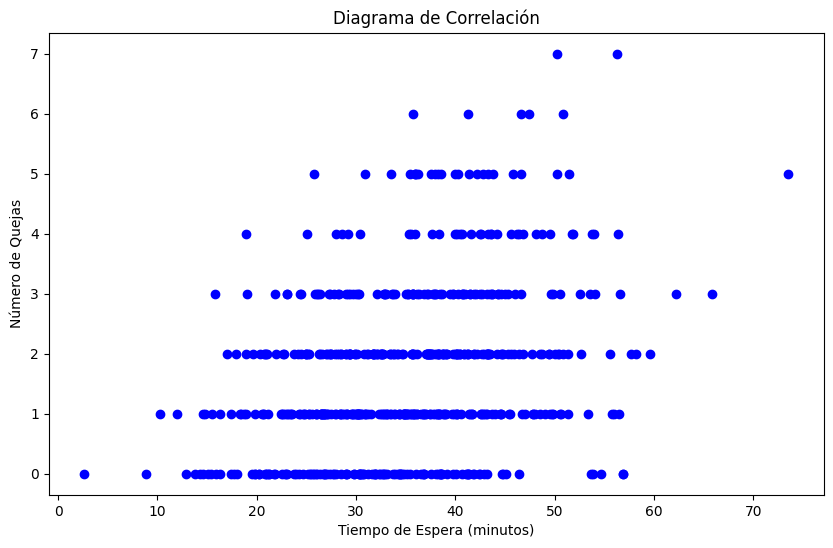

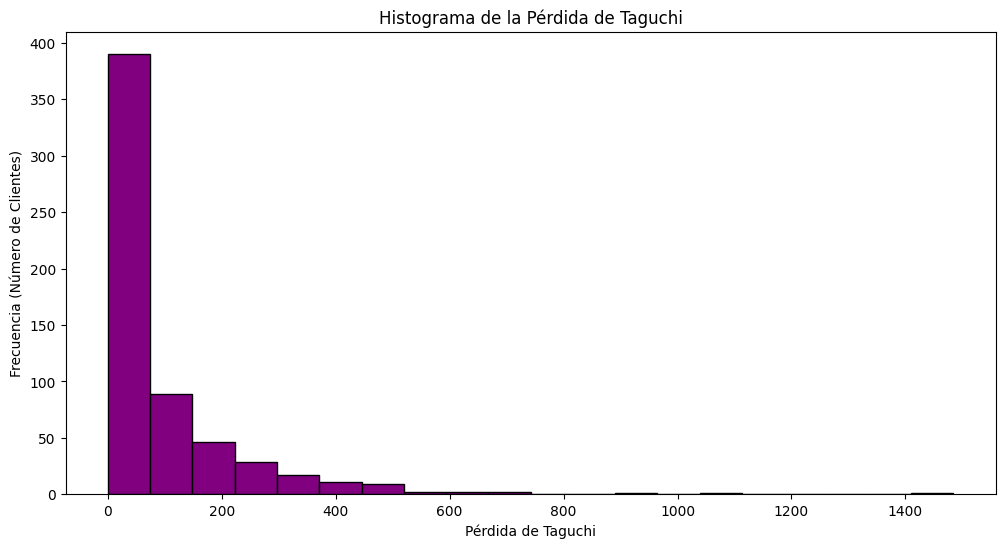


Total de Quejas: 635
Total de Sugerencias Generales: 276


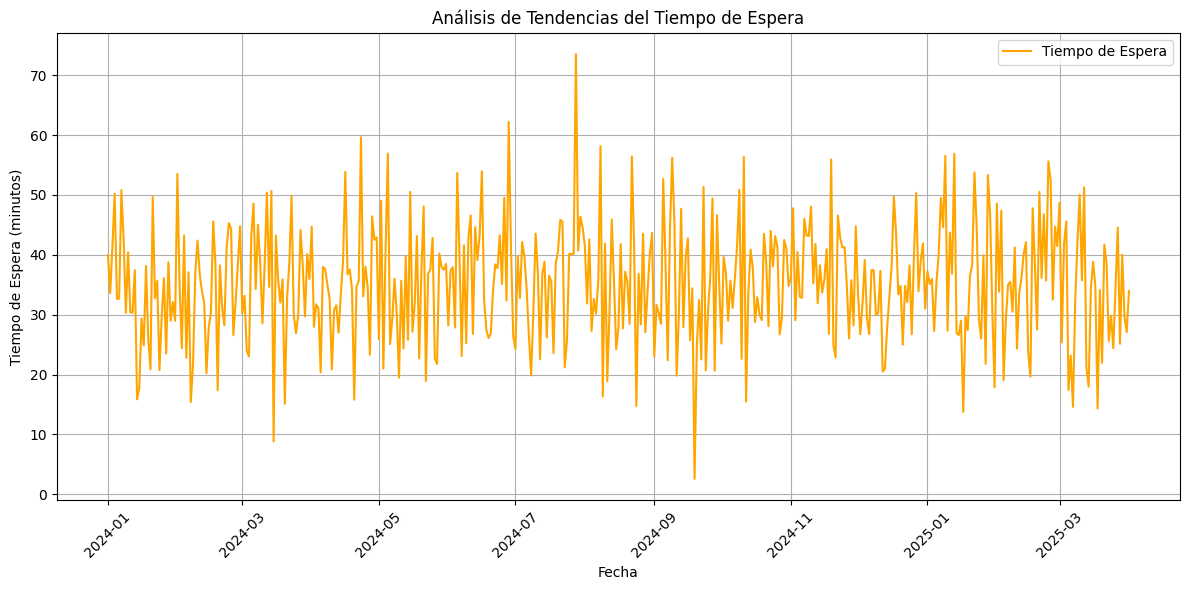

Evaluación 360º:
         Categoría  Satisfacción  \
0  Personal Médico           4.1   
1        Pacientes           3.3   
2  Administrativos           3.8   

                                         Comentarios  \
0  La atencion es buena y posee buenos profesionales   
1  El tiempo de espera para la atencion es un poc...   
2  Se necesita una mejora en la coordinacion entr...   

                                      Sugerencias  
0     Mejorar la comunicación entre departamentos  
1      Reducir el tiempo de espera en el servicio  
2  Implementar un sistema de seguimiento de citas  


In [ ]:
#########################################   PARETO    #########################################
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Especialidades médicas
especialidades = ['Cardiología', 'Neurología', 'Oncología', 'Pediatría', 'Traumatología']

# Simulamos 600 clientes con quejas distribuidas entre las 5 especialidades
# Supongamos que generamos aleatoriamente un número de quejas por especialidad
np.random.seed(42)  # Para hacer reproducible la simulación
quejas_por_especialidad = np.random.randint(50, 200, size=len(especialidades))  # Generar de 50 a 200 quejas

# Crear un DataFrame para organizar los datos
data = pd.DataFrame({
    'Especialidad': especialidades,
    'Quejas': quejas_por_especialidad
})

# Simulación de sugerencias generales (que no dependen de las especialidades)
sugerencias_generales = np.random.randint(30, 100, size=len(especialidades))  # Generar de 30 a 100 sugerencias por especialidad

# Agregar columna de sugerencias al DataFrame
data['Sugerencias'] = sugerencias_generales

# Ordenamos los datos de mayor a menor número de quejas
data = data.sort_values(by='Quejas', ascending=False).reset_index(drop=True)

# Calculamos el porcentaje acumulado para el diagrama de Pareto
data['Porcentaje'] = 100 * data['Quejas'] / data['Quejas'].sum()
data['Porcentaje Acumulado'] = data['Porcentaje'].cumsum()

# Mostrar los datos
print(data)

# --- Crear el gráfico de Pareto ---
fig, ax1 = plt.subplots()

# Gráfico de barras para el número de quejas
ax1.bar(data['Especialidad'], data['Quejas'], color='skyblue')
ax1.set_xlabel('Especialidades')
ax1.set_ylabel('Número de quejas', color='gray')

# Crear el segundo eje Y para el porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(data['Especialidad'], data['Porcentaje Acumulado'], color='black', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Porcentaje Acumulado', color='black')
ax2.axhline(y=80, color='r', linestyle='--')  # Línea de referencia del 80% del Pareto

plt.title('Diagrama de Pareto')

plt.show()

# --- Cálculo del Total de Quejas y Total de Sugerencias ---

# Total de quejas (permitiendo múltiples quejas por cliente)
total_quejas = data['Quejas'].sum()
total_sugerencias = data['Sugerencias'].sum()




#########################################   DIAGRAMA DE CONTROL    #########################################
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulación de 600 clientes y sus tiempos de espera (en minutos)
np.random.seed(42)  # Para reproducibilidad
num_clientes = 600
tiempos_espera = np.random.normal(loc=35, scale=10, size=num_clientes)  # Media de 35 minutos, desviación estándar de 10

# Número de registro (asumido como el número de cliente)
registros = np.arange(1, num_clientes + 1)

# Crear un DataFrame con los datos simulados
data = pd.DataFrame({
    'Registro': registros,
    'Tiempo de Espera': tiempos_espera
})

# Cálculo de los valores necesarios para el gráfico de control
media_espera = data['Tiempo de Espera'].mean()  # Media de los tiempos de espera
sigma_espera = data['Tiempo de Espera'].std()   # Desviación estándar

# Cálculo de los límites de control superior e inferior (3 sigma)
LCS = media_espera + 3 * sigma_espera  # Límite de control superior
LCI = media_espera - 3 * sigma_espera  # Límite de control inferior

# Crear el gráfico de control
plt.figure(figsize=(12,6))
plt.plot(data['Registro'], data['Tiempo de Espera'].rolling(window=30).mean(), color='gray', label='Media Tiempos de Espera')
plt.axhline(y=media_espera, color='blue', linestyle='--', label='Media')
plt.axhline(y=LCS, color='red', linestyle='--', label='Límite de Control Superior (LCS)')
plt.axhline(y=LCI, color='green', linestyle='--', label='Límite de Control Inferior (LCI)')
plt.fill_between(data['Registro'], LCI, LCS, alpha=0.1)
plt.tight_layout()
plt.grid()

# Etiquetas y leyenda
plt.title('Gráfico de Control del Tiempo de Espera')
plt.xlabel('Número de Registro del Cliente')
plt.ylabel('Tiempo de Espera (minutos)')
plt.legend()
plt.show()


#########################################   HISTOGRAMA    #########################################
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# Simulación de 600 clientes y sus tiempos de espera (en minutos)
np.random.seed(42)  # Para reproducibilidad
num_clientes = 600
tiempos_espera = np.random.normal(loc=35, scale=10, size=num_clientes)  # Media de 35 minutos, desviación estándar de 10

# Crear el histograma
plt.figure(figsize=(10,6))
plt.hist(tiempos_espera, bins=15, color='green', edgecolor='black')

# Etiquetas del gráfico
plt.title('Histograma del Tiempo de Espera')
plt.xlabel('Tiempo de Espera (minutos)')
plt.ylabel('Frecuencia (Número de Clientes)')

# Mostrar el gráfico
plt.show()

#########################################   DIAGRAMA DE CORRELACION    #########################################
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# Simulación de 600 clientes y sus tiempos de espera (en minutos)
np.random.seed(42)  # Para reproducibilidad
num_clientes = 600
tiempos_espera = np.random.normal(loc=35, scale=10, size=num_clientes)  # Media de 35 minutos, desviación estándar de 10

# Simulación del número de quejas de los clientes
# Suponemos que a mayor tiempo de espera, más probable es que haya quejas (una ligera correlación positiva)
quejas = np.random.poisson(lam=0.05 * tiempos_espera, size=num_clientes)  # Quejas como función del tiempo de espera

# Crear el diagrama de correlación (scatter plot)
plt.figure(figsize=(10,6))
plt.scatter(tiempos_espera, quejas, color='blue')

# Etiquetas del gráfico
plt.title('Diagrama de Correlación')
plt.xlabel('Tiempo de Espera (minutos)')
plt.ylabel('Número de Quejas')

# Mostrar el gráfico
plt.show()

#########################################   HISTOGRAMA TAGUCHI    #########################################

# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# Simulación de 600 clientes y sus tiempos de espera (en minutos)
np.random.seed(42)  # Para reproducibilidad
num_clientes = 600
tiempos_espera = np.random.normal(loc=35, scale=10, size=num_clientes)  # Media de 35 minutos, desviación estándar de 10

# Parámetros de la pérdida de Taguchi
T = 35  # Valor objetivo (tiempo de espera ideal, en minutos)
k = 1  # Factor de conversión a pérdida

# Cálculo de la pérdida de Taguchi para cada cliente
perdida_taguchi = k * (tiempos_espera - T) ** 2

# Crear el histograma de la pérdida de Taguchi
plt.figure(figsize=(12,6))
plt.hist(perdida_taguchi, bins=20, color='purple', edgecolor='black')

# Etiquetas del gráfico
plt.title('Histograma de la Pérdida de Taguchi')
plt.xlabel('Pérdida de Taguchi')
plt.ylabel('Frecuencia (Número de Clientes)')

# Mostrar el gráfico
plt.show()

#########################################   QUEJAS Y SUGERENCIAS    #########################################
# Mostrar totales
print(f"\nTotal de Quejas: {total_quejas}")
print(f"Total de Sugerencias Generales: {total_sugerencias}")


#########################################   ANALISIS DE TENDENCIA    #########################################
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulación de datos
np.random.seed(42)  # Para reproducibilidad
num_dias = 457  # Simulamos para 30 días
tiempos_espera = np.random.normal(loc=35, scale=10, size=num_dias)  # Tiempos de espera en minutos (media de 20, desviación estándar de 5)

# Crear un DataFrame con los datos simulados
fechas = pd.date_range(start='2024-01', periods=num_dias, freq='D')  # Fechas para el mes
df_tiempos = pd.DataFrame({
    'Fecha': fechas,
    'Tiempo de Espera': tiempos_espera
})

# Calcular la media móvil para suavizar la tendencia
df_tiempos['Media Móvil'] = df_tiempos['Tiempo de Espera'].rolling(window=30).mean()

# Crear el gráfico de tendencias
plt.figure(figsize=(12, 6))
plt.plot(df_tiempos['Fecha'], df_tiempos['Tiempo de Espera'], linestyle='-', color='orange', label='Tiempo de Espera')

# Personalizar el gráfico
plt.title('Análisis de Tendencias del Tiempo de Espera')
plt.xlabel('Fecha')
plt.ylabel('Tiempo de Espera (minutos)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


#########################################   EVALUACION 360    #########################################
# Importar las librerías necesarias
import pandas as pd

# Recopilar datos de evaluación 360º
evaluacion_360 = {
    'Categoría': ['Personal Médico', 'Pacientes', 'Administrativos'],
    'Satisfacción': [4.1, 3.3, 3.8],  # Puntajes promedio de satisfacción en una escala de 1 a 5
    'Comentarios': [
        'La atencion es buena y posee buenos profesionales',
        'El tiempo de espera para la atencion es un poco elevado',
        'Se necesita una mejora en la coordinacion entre los sectores de atencion'
    ],
    'Sugerencias': [
        'Mejorar la comunicación entre departamentos',
        'Reducir el tiempo de espera en el servicio',
        'Implementar un sistema de seguimiento de citas'
    ]
}

# Crear un DataFrame para organizar los datos
df_evaluacion = pd.DataFrame(evaluacion_360)

# Mostrar los resultados
print("Evaluación 360º:")
print(df_evaluacion)




